## **HW4 Principal Component Analysis**

# 1. Introduction
Congratulations on reaching the final assignment! In this assignment, you will learn how to use Principal Components Analysis (PCA) to reduce the dimensionality of high-dimensional data. Additionally, you will compare various differences between the original high-dimensional data and the transformed data obtained through PCA.

In [1]:
!pip3 install import_ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.7/333.7 kB 4.7 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


Since the version of numpy can affect some output results, please ensure that your numpy version is == 1.22.2 before you start Homework 4.

**Expected output**

numpy==1.22.2

In [1]:
# You are not allowed to import other packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import math

import import_ipynb
from PCA import MY_PCA, MY_SparsePCA
from Model import *
from Loss import *
from Utils import *
from Data_preprocess import *
from Trainer import *
from Config import *

import time

importing Jupyter notebook from PCA.ipynb
importing Jupyter notebook from Data_preprocess.ipynb
importing Jupyter notebook from Model.ipynb
importing Jupyter notebook from Loss.ipynb
importing Jupyter notebook from Utils.ipynb
importing Jupyter notebook from Trainer.ipynb
importing Jupyter notebook from Config.ipynb


## Model & Data preprocess

As mentioned in Assignment 3, this assignment is closely related to it. Please follow the data preprocessing and model implementation steps from Assignment 3. Note that there are additional constraints on the layer stacking in the model implementation this time. Be sure to follow the prompts for designing the model accordingly.

This time, we'll organize different functionalities into separate files for better code readability. For the model and data preprocessing, please implement them in the following files: Loss.ipynb, Model.ipynb, and Data_preprocess.ipynb.

Train: X=(31065, 28, 28), Y=(31065,)
Test: X=(7767, 28, 28)


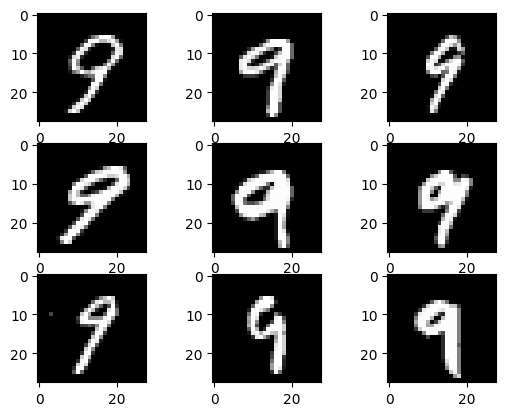

shape of X_train: (31065, 28, 28)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 28, 28)

shape of X_train: (31065, 784)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 784)
shape of x_train: (24852, 784)
shape of y_train: (24852, 10)
training data - percentage [0.18, 0.18, 0.14, 0.13, 0.11, 0.08, 0.07, 0.06, 0.04, 0.02]
shape of x_val: (6213, 784)
shape of y_val: (6213, 10)
validation data - percentage [0.18, 0.19, 0.14, 0.12, 0.1, 0.09, 0.07, 0.06, 0.04, 0.02]


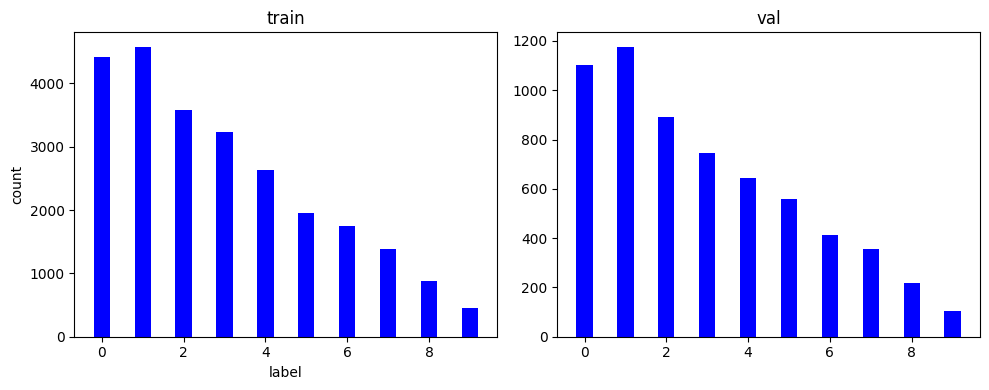

In [2]:
X_train, Y_train, X_test = load_data('basic_data.npz')
x_train, y_train, x_val, y_val = data_preprocess(X_train, Y_train)

# 2. Basic Part

## PCA Implement
In this section, you are required to implement PCA by completing the following steps in the PCA.ipynb file.
>* Step1. Centering
>* Step2. Covariance matrix computation
>* Step3. Eigenvectors and eigenvalues computation
>* Step4. Projection

After implementing PCA, you need to reduce the data to two dimensions, observe the two-dimensional scatter plot of the data, and include it in the report.

In [3]:
# GRADED CODE: DATA CENTRALIZATION
### START CODE HERE ###
mu = x_train.mean(axis=0)
x_train_cent = x_train - mu
x_val_cent = x_val - mu
X_test_cent = X_test - mu
### END CODE HERE ###

<string>:82: ComplexWarning: Casting complex values to real discards the imaginary part
<string>:83: ComplexWarning: Casting complex values to real discards the imaginary part


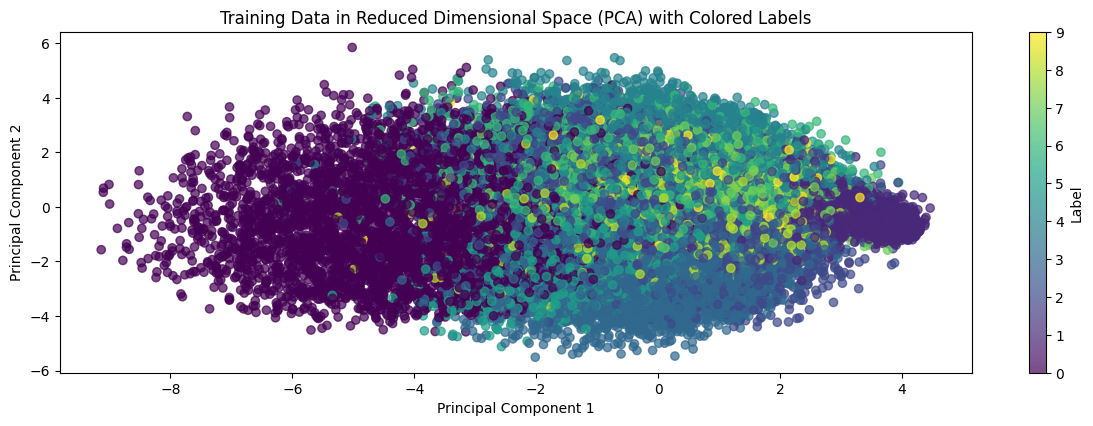

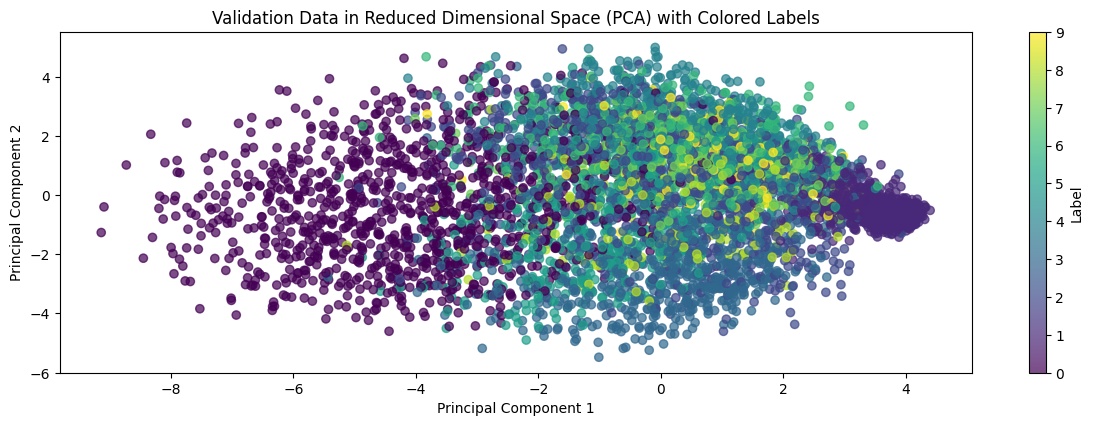

In [4]:
# GRADED CODE: PCA SCATTER PLOT VISUALIZATION
### START CODE HERE ###
pca = MY_PCA(2)
x_train_pca = pca.fit_transform(x_train_cent)
x_val_pca = pca.transform(x_val_cent)
x_test_pca = pca.transform(X_test_cent)

pca.PCA_visualization(x_train_pca, y_train, tag="Training")
pca.PCA_visualization(x_val_pca, y_val, tag="Validation")
### END CODE HERE ###

In [5]:
basic_cov = pca.covariance_matrix
print('covariance_matrix: ', (basic_cov[100][12:16]*10000).round(3))
print(f'x_train_pca:', x_train_pca[0].round(3))
print('x_val_pca: ',x_val_pca[0].round(3))

covariance_matrix:  [0.015 0.322 0.322 0.013]
x_train_pca: [-0.707 -3.321]
x_val_pca:  [2.295 2.88 ]


**Expected Output**
$$ covariance\_matrix:\  [0.015\ \  0.322\ \ 0.322\ \ 0.013]$$
$$ x\_train\_pca:\ [0.707\ \ 3.321]$$
$$ x\_val\_pca:\ [-2.295\  -2.88]$$
$$or$$
$$ x\_train\_pca:\ [-0.707\ \ -3.321]$$
$$ x\_val\_pca:\ [2.295\  2.88]$$

In [6]:
# GRADED CODE: TRAINING MODEL WITH PCA DATA (PCA for Training, Validation and Test Dataset)
### START CODE HERE ###
n_components = 256
pca = MY_PCA(n_components)
x_train_pca = pca.fit_transform(x_train_cent)
x_val_pca = pca.transform(x_val_cent)
x_test_pca = pca.transform(X_test_cent)
### END CODE HERE ###



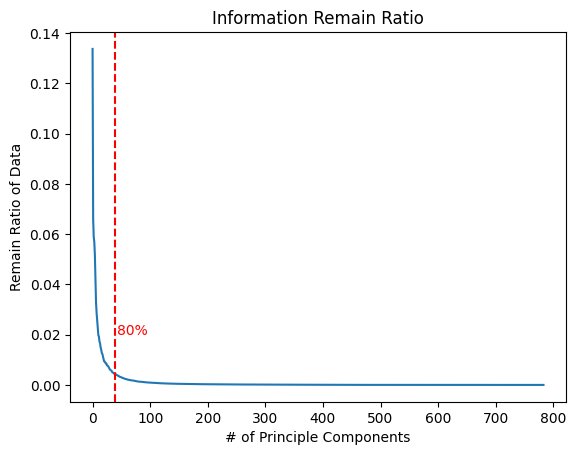

In [7]:
# GRADED CODE: PCA INFORMATION REMAIN RATIO PLOT
### START CODE HERE ###
num_PC, var_ratio = pca.components_remain_ratio(0.80)
### END CODE HERE###


plt.plot(var_ratio)
plt.axvline(x=num_PC, color='r', linestyle='--')

plt.text(x=num_PC+3, y=0.02, s='80%', color='r')
plt.title('Information Remain Ratio')
plt.xlabel('# of Principle Components')
plt.ylabel('Remain Ratio of Data')
plt.show()
plt.savefig('Infotmation Remaining Ratio.png')
plt.close()

In [8]:

reconstruct_data_train, z_train = pca.reconstructData(x_train[0], np.mean(x_train, axis=0), 4)
reconstruct_data_val, z_val = pca.reconstructData(x_val[0], np.mean(x_train, axis=0), 4)

# GRADED CODE: PCA RECONSTRUCT IMAGE PLOT
### START CODE HERE ###
reconstruct_img = reconstruct_data_train.reshape((28, 28))
### END CODE HERE ###

plt.imshow(reconstruct_img, cmap='binary')
plt.savefig('reconstruct_img.png')
plt.close()


train_squared_reconstruct_error = np.sum(x_train[0] - reconstruct_data_train)**2/reconstruct_data_train.shape[0]
val_squared_reconstruct_error = np.sum(x_val[0] - reconstruct_data_val)**2/reconstruct_data_val.shape[0]

In [9]:
print('k principle components:', num_PC)
print('Train Squared Reconstruct Error: ', train_squared_reconstruct_error.round(3))
print('Validation Squared Reconstruct Error: ',val_squared_reconstruct_error.round(3))
print('z: ', ['%.3f' %(z) for z in z_train])

k principle components: 39
Train Squared Reconstruct Error:  0.043
Validation Squared Reconstruct Error:  0.077
z:  ['-0.707', '-3.321', '0.928', '-0.603']


**Expected output:**

$$ k\ principle\ components:  40 $$
$$ Train\ Squared\ Recontstruct\ Error:  0.043 $$
$$ Validation\ Squared\ Reconstruct\ Error:  0.077 $$
$$ z:  [0.707, 3.321, 0.928, 0.603] $$
$$or$$
$$ z:  [-0.707, -3.321, 0.928, -0.603] $$

### Mdoel
In this part, you need to train your model with low-dimensional data (after PCA) and original data, respectively. Compare the difference between them.

In [10]:
config = Config([x_train.shape[1], 128, 10], 'focal_loss')

#GRADED CODE: TRAINING MODEL WITHOUT PCA DATA (MODEL SETTING AND TRAINING)
### START CODE HERE ###
model = Model(config)

learning_rate = 0.05
num_iterations = 128
losses = []
print_freq = 16

for i in range(num_iterations):
    mini_batches = random_mini_batches(x_train, y_train)
    for batch in mini_batches:
        x_batch, y_batch = batch
        AL = model.forward(x_batch)
        dA_prev = model.backward(AL, y_batch)
        model.update(learning_rate)
    loss = compute_focal_loss(model.forward(x_val), y_val, config.alpha, config.gamma)
    losses.append(loss)
    if not i % print_freq:
        print("Loss after iteration", i, ':', loss)
        predict(x_val, y_val, model)
        print()
### END CODE HERE ###

Loss after iteration 0 : 36.16296437873509
Accuracy: 6.18%
f1 score for each class: [0.         0.         0.         0.         0.         0.00321543
 0.06465834 0.12203024 0.         0.        ]
f1_macro score: 0.02

Loss after iteration 16 : 30.696893345683346
Accuracy: 9.62%
f1 score for each class: [0.         0.         0.         0.         0.         0.00688468
 0.89598109 0.         0.07263598 0.        ]
f1_macro score: 0.10

Loss after iteration 32 : 30.448184385563394
Accuracy: 16.06%
f1 score for each class: [0.         0.         0.         0.         0.19867345 0.
 0.90076336 0.         0.         0.        ]
f1_macro score: 0.11

Loss after iteration 48 : 30.383400476879423
Accuracy: 11.60%
f1 score for each class: [0.         0.         0.00223214 0.         0.         0.
 0.89987639 0.1155469  0.         0.        ]
f1_macro score: 0.10

Loss after iteration 64 : 30.03115334001601
Accuracy: 11.77%
f1 score for each class: [0.         0.         0.         0.         0

In [11]:
pred_train = predict(x_train, y_train, model)

Accuracy: 11.93%
f1 score for each class: [0.         0.         0.         0.         0.         0.
 0.93686718 0.11300215 0.         0.        ]
f1_macro score: 0.10


In [12]:
pred_val = predict(x_val, y_val, model)

Accuracy: 11.73%
f1 score for each class: [0.         0.         0.         0.         0.00308166 0.
 0.91064871 0.11558442 0.         0.        ]
f1_macro score: 0.10


In [13]:
config = Config([n_components, 128, 10], 'focal_loss')

# GRADED CODE: TRAINING MODEL WITH PCA DATA (MODEL SETTING AND TRAINING)
### START CODE HERE ###
model = Model(config)

learning_rate = 0.05
num_iterations = 128
losses = []
print_freq = 16

for i in range(num_iterations):
    mini_batches = random_mini_batches(x_train_pca, y_train)
    for batch in mini_batches:
        x_batch, y_batch = batch
        AL = model.forward(x_batch)
        dA_prev = model.backward(AL, y_batch)
        model.update(learning_rate)
    loss = compute_focal_loss(model.forward(x_val_pca), y_val, config.alpha, config.gamma)
    losses.append(loss)
    if not i % print_freq:
        print("Loss after iteration", i, ':', loss)
        predict(x_val_pca, y_val, model)
        print()
### END CODE HERE ###

Loss after iteration 0 : 3.434054834052617
Accuracy: 90.50%
f1 score for each class: [0.86183873 0.97548387 0.93333333 0.9179661  0.94801223 0.79638009
 0.92575406 0.8856383  0.83842795 0.75229358]
f1_macro score: 0.88

Loss after iteration 16 : 2.8196544732157665
Accuracy: 97.10%
f1 score for each class: [0.98285199 0.98894558 0.96788732 0.96510067 0.97767513 0.95978552
 0.9684466  0.95264624 0.93208431 0.88349515]
f1_macro score: 0.96

Loss after iteration 32 : 2.8904824429487643
Accuracy: 97.02%
f1 score for each class: [0.98106402 0.98894558 0.96559504 0.96648794 0.97688752 0.96071429
 0.96368039 0.9567643  0.93176471 0.86829268]
f1_macro score: 0.96

Loss after iteration 48 : 2.910754469563092
Accuracy: 97.07%
f1 score for each class: [0.98150654 0.98894558 0.96617813 0.96648794 0.97688752 0.96071429
 0.96618357 0.95810056 0.93176471 0.87254902]
f1_macro score: 0.96

Loss after iteration 64 : 2.9208283691596306
Accuracy: 97.12%
f1 score for each class: [0.98196573 0.98894558 0.966

In [14]:
pred_train = predict(x_train_pca, y_train, model)

Accuracy: 100.00%
f1 score for each class: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
f1_macro score: 1.00


In [15]:
pred_val = predict(x_val_pca, y_val, model)

Accuracy: 97.20%
f1 score for each class: [0.98242452 0.98894558 0.96843292 0.96843519 0.97846154 0.96256684
 0.96735187 0.95810056 0.93396226 0.87684729]
f1_macro score: 0.96


In [16]:
pred_test = predict(x_test_pca, None, model)
outputs = {}
outputs["basic_pred_test"] = pred_test
outputs["basic_layers_dims"] = config.layers_dims
outputs["basic_activation_fn"] = config.activation_fn
outputs["basic_loss_function"] = config.loss_function
outputs["basic_alpha"] = config.alpha
outputs["basic_gamma"] = config.gamma
outputs["basic_reconstruct_data_train"] = reconstruct_data_train
outputs["basic_reconstruct_data_val"] = reconstruct_data_val
outputs["basic_covariance_matrix"] = basic_cov
outputs["basic_var_ratio"] = var_ratio
basic_model_parameters = []
for basic_linear in model.linear:
    basic_model_parameters.append(basic_linear.parameters)
outputs["basic_model_parameters"] = basic_model_parameters

# 3. Advanced Part

In the advanced section, you will learn how to implement non-linear PCA, Sparse PCA.
Please complete the PCA.ipynb file for this purpose.

Train: X=(31065, 28, 28), Y=(31065,)
Test: X=(7767, 28, 28)


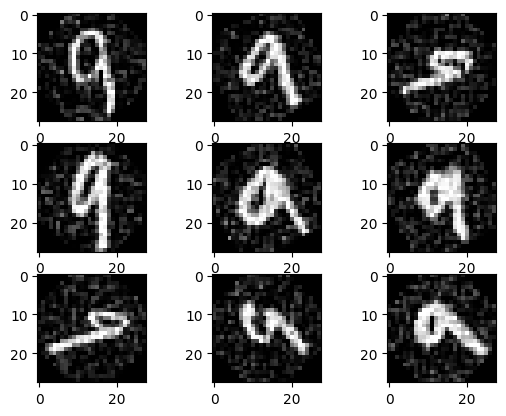

shape of X_train: (31065, 28, 28)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 28, 28)

shape of X_train: (31065, 784)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 784)
shape of x_train: (24852, 784)
shape of y_train: (24852, 10)
training data - percentage [0.18, 0.18, 0.14, 0.13, 0.11, 0.08, 0.07, 0.06, 0.04, 0.02]
shape of x_val: (6213, 784)
shape of y_val: (6213, 10)
validation data - percentage [0.18, 0.19, 0.14, 0.12, 0.1, 0.09, 0.07, 0.06, 0.04, 0.02]


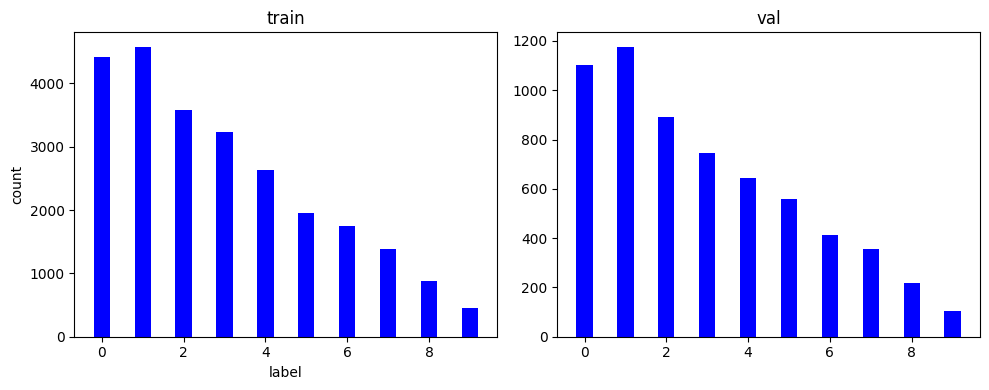

In [2]:
X_noise_train, Y_noise_train, X_noise_test = load_data('advanced_data.npz')
x_noise_train, y_noise_train, x_noise_val, y_noise_val = data_preprocess(X_noise_train, Y_noise_train)

In [3]:
# GRADED CODE: DATA CENTRALIZATION
### START CODE HERE ###
mu = x_noise_train.mean(axis=0)
x_noise_train_cent = x_noise_train - mu
x_noise_val_cent = x_noise_val - mu
X_noise_test_cent = X_noise_test - mu
### END CODE HERE ###

In [ ]:
# YOU CAN DO PCA HERE TO COMPARE THE PERFORMANCE WITH SPARCEPCA (NOT FOR GRADING)
# PCA PART
### START CODE HERE ###
#PCA PART
None

#TRAIN WITH ORIGINAL DATA
None

#TRAIN WITH PCA DATA
None

### END CODE HERE ###

### SparsePCA

In [4]:
n_components = 2
sparse_pca = MY_SparsePCA(n_components, 0.001, 1000)

# GRADED CODE: SPARSE PCA IMPLEMENT
### START CODE HERE ###
x_train_spca = sparse_pca.fit_transform(x_noise_train_cent)
x_val_spca = sparse_pca.transform(x_noise_val_cent)
x_test_spca = sparse_pca.transform(X_noise_test_cent)
### END CODE HERE ###

100%|██████████| 1000/1000 [03:12<00:00,  5.19it/s]


In [5]:
sparse_pca_check = x_train_spca
sparse_Vt = sparse_pca.Vt[0][0]

print('Sparse_pca init Vt: ', sparse_Vt)
print('x_train_spca: ', sparse_pca_check[0].round(3))

Sparse_pca init Vt:  1.7416042788485456e-20
x_train_spca:  [-0.229 -0.762]


**Expected Output**
$$ Sparse\_pca\ init\ Vt:\ [1.74160428e^{-20}] $$
$$ x\_train\_spca:\ [-0.229\ \ -0.762]$$

In [6]:
# GRADED CODE: SPARSE PCA IMPLEMENT
### START CODE HERE ###
n_components = 256
sparse_pca = MY_SparsePCA(n_components, 0.001, 1000)
x_train_spca = sparse_pca.fit_transform(x_noise_train_cent)
x_val_spca = sparse_pca.transform(x_noise_val_cent)
x_test_spca = sparse_pca.transform(X_noise_test_cent)
### END CODE HERE ###

100%|██████████| 1000/1000 [04:07<00:00,  4.04it/s]


In [7]:
config = Config([n_components, 64, 10], 'focal_loss')

# GRADED CODE: SPARSE PCA IMPLEMENT
### START CODE HERE ###
model = Model(config)

learning_rate = 0.05
num_iterations = 128
losses = []
print_freq = 16

for i in range(num_iterations):
    mini_batches = random_mini_batches(x_train_spca, y_noise_train)
    for batch in mini_batches:
        x_batch, y_batch = batch
        AL = model.forward(x_batch)
        dA_prev = model.backward(AL, y_batch)
        model.update(learning_rate)
    loss = compute_focal_loss(model.forward(x_val_spca), y_noise_val, config.alpha, config.gamma)
    losses.append(loss)
    if not i % print_freq:
        print("Loss after iteration", i, ':', loss)
        predict(x_val_spca, y_noise_val, model)
        print()
### END CODE HERE ###

Loss after iteration 0 : 8.561915208897986
Accuracy: 78.43%
f1 score for each class: [0.83176594 0.89468779 0.76063492 0.81073446 0.80883368 0.66305085
 0.76290832 0.72623139 0.63402062 0.5560166 ]
f1_macro score: 0.74

Loss after iteration 16 : 10.68848892457784
Accuracy: 85.76%
f1 score for each class: [0.91146589 0.94773825 0.8549884  0.84488044 0.81016949 0.76782753
 0.86384977 0.81736909 0.73593074 0.67213115]
f1_macro score: 0.82

Loss after iteration 32 : 10.687265601236481
Accuracy: 88.73%
f1 score for each class: [0.91217855 0.965041   0.87307911 0.87363695 0.88084465 0.86231884
 0.85231116 0.86178862 0.76106195 0.70222222]
f1_macro score: 0.85

Loss after iteration 48 : 11.888945485193545
Accuracy: 90.94%
f1 score for each class: [0.95056689 0.97000422 0.89227298 0.896      0.88185328 0.86854034
 0.91215403 0.88515406 0.79814385 0.71497585]
f1_macro score: 0.88

Loss after iteration 64 : 12.346493621410279
Accuracy: 91.02%
f1 score for each class: [0.95121951 0.97082452 0.894

In [8]:
sparse_pred_train = predict(x_train_spca, y_noise_train, model)

Accuracy: 99.98%
f1 score for each class: [0.99943317 1.         0.99986024 0.99969059 0.99981043 1.
 0.99971355 1.         1.         1.        ]
f1_macro score: 1.00


In [9]:
sparse_pred_val = predict(x_val_spca, y_noise_val, model)

Accuracy: 91.07%
f1 score for each class: [0.95401262 0.96923725 0.89807475 0.89581951 0.88049345 0.87202925
 0.90556901 0.88575458 0.80278422 0.71219512]
f1_macro score: 0.88


In [10]:
sparse_pred_test = predict(x_test_spca, None, model)

### Advaced Ranking
In the advanced ranking section, you are allowed to integrate PCA with additional data preprocessing. However, please note that you are not permitted to use existing data preprocessing and PCA libraries, modify the model's architecture, or alter the predetermined configuration.

In [ ]:
# GRADED CODE: RANKING PART DO YOUR DATA PREPROCESS HERE
### START CODE HERE ###
input_dim = None
loss_function = None

### END CODE HERE ###

In [ ]:
adv_config = Config([input_dim, 128, 10], loss_function)
adv_model = Model(adv_config)

# GRADED CODE: RANKING PART DO YOUR TRAINING WORK HERE
### START CODE HERE ###
None
adv_pred_test = predict(None, None, adv_model)
### END CODE HERE ###

In [ ]:
outputs["sparse_Vt"] = sparse_Vt
outputs["sparse_pca"] = sparse_pca_check
outputs["sparse_pred_train"] = sparse_pred_train
outputs["sparse_pred_val"] = sparse_pred_val
outputs["sparse_pred_test"] = sparse_pred_test

outputs["advanced_pred_test"] = adv_pred_test
outputs["advanced_layers_dims"] = adv_config.layers_dims
outputs["advanced_activation_fn"] = adv_config.activation_fn
outputs["advanced_loss_function"] = adv_config.loss_function
outputs["advanced_alpha"] = adv_config.alpha
outputs["advanced_gamma"] = adv_config.gamma


advanced_model_parameters = []
for advanced_linear in adv_model.linear:
    advanced_model_parameters.append(advanced_linear.parameters)
outputs["advanced_model_parameters"] = advanced_model_parameters

In [ ]:
# sanity check
assert list(outputs.keys()) == [
    'basic_pred_test',\
    'basic_layers_dims',\
    'basic_activation_fn',\
    'basic_loss_function',\
    'basic_alpha',\
    'basic_gamma',\
    'basic_reconstruct_data_train',\
    'basic_reconstruct_data_val',\
    'basic_covariance_matrix',\
    'basic_var_ratio',\
    'basic_model_parameters',\
    'sparse_Vt',\
    'sparse_pca',\
    'sparse_pred_train',\
    'sparse_pred_val',\
    'sparse_pred_test',\
    'advanced_pred_test',\
    'advanced_layers_dims',\
    'advanced_activation_fn',\
    'advanced_loss_function',\
    'advanced_alpha',\
    'advanced_gamma',\
    'advanced_model_parameters'],\
"You're missing something, please restart the kernel and run the code from begining to the end. If the same error occurs, maybe you deleted some outputs, check the template to find the missing parts!"

In [ ]:
np.save("output.npy", outputs)

In [ ]:
# sanity check
submit = np.load("output.npy", allow_pickle=True).item()
for key, value in submit.items():
    print(str(key) + "： " + str(type(value)))